# Introduction/Business Problem

**Background on Data**

The data was gathered weekly in Seattle, from 2004 to present. It is gathered by the Seattle Department of Transportation. There are 37 attributes in the data, including location, collision type, and fatalities.

This data will be used to solve this problem by focusing on certain attributes, such as the address type and inattention. Using these attributes, and others, will help identify if certain areas/locations are more dangerous. For my analysis, I will focus on a few specific attributes; ROADCOND, LIGHTCOND, WEATHER, and ADDRTYPE.

ADDRTYPE

**Addressing the Problem**

The problem for this project is predicting the severity of traffic collisions based on accident data. This data could help identify safety issues for  drivers, motorists, pedestrians, and cyclists. This data could be helpful for emergency response teams, pedestrians, and the DOT.

Emergency response teams could know which locations are more susceptible to accidents and the severity of the accident. Thus, they will be more prepared for specific accidents. Further, the reasons for the accidents can be discovered and hopefully addressed.

Pedestrians could learn which areas are more dangerous for them to be in, as they could be injured due to certain factors of the location, such as a tight corner or no stop light.

The DOT could use this data to fix areas where there are a high amount of collisions due to a lack of signange (stop signs, etc.) or lights.

# Data

In [31]:
import pandas as pd
import numpy as np
file = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(file) #loading in the data

df.head()


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


The dependent variable is “SEVERITYCODE”. Each number corresponds to a different level of severity:

0 No/negligible probability: no/negligible chance
1 Very low probability: Chance of car damage
2 Low probability: Chance of injury and/or car damage
3 Mild probability: Chance of serious injury and car damage
4 High probability: Fatal and car damage

I want to see how the data I choose below affects the severity of the accident. I will use certain charts/plots to do so.

In [43]:
df.dtypes.value_counts()

#drop columns that will not be used in the prediction of severity
df_p = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

#convert columns to categories
df_p["WEATHER"] = df_p["WEATHER"].astype('category')
df_p["LIGHTCOND"] = df_p["LIGHTCOND"].astype('category')
df_p["ROADCOND"] = df_p["ROADCOND"].astype('category')
df_p["ADDRTYPE"] = df_p["ADDRTYPE"].astype('category')
df_p["COLLISIONTYPE"] = df_p["COLLISIONTYPE"].astype('category')



#give columns assigned categories
df_p["WEATHER_CAT"] = df_p["WEATHER"].cat.codes
df_p["LIGHTCOND_CAT"] = df_p["LIGHTCOND"].cat.codes
df_p["ROADCOND_CAT"] = df_p["ROADCOND"].cat.codes
df_p["ADDRTYPE_CAT"] = df_p["ADDRTYPE"].cat.codes
df_p["COLLISIONTYPE_CAT"] = df_p["COLLISIONTYPE"].cat.codes



df_p.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,LIGHTCOND_CAT,ROADCOND_CAT,ADDRTYPE_CAT,COLLISIONTYPE_CAT
0,2,Intersection,Angles,Overcast,Wet,Daylight,4,5,8,2,0
1,1,Block,Sideswipe,Raining,Wet,Dark - Street Lights On,6,2,8,1,9
2,1,Block,Parked Car,Overcast,Dry,Daylight,4,5,0,1,5
3,1,Block,Other,Clear,Dry,Daylight,1,5,0,1,4
4,2,Intersection,Angles,Raining,Wet,Daylight,6,5,8,2,0


In [44]:
df_p.dtypes

SEVERITYCODE            int64
ADDRTYPE             category
COLLISIONTYPE        category
WEATHER              category
ROADCOND             category
LIGHTCOND            category
WEATHER_CAT              int8
LIGHTCOND_CAT            int8
ROADCOND_CAT             int8
ADDRTYPE_CAT             int8
COLLISIONTYPE_CAT        int8
dtype: object

In [39]:
df_p["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [40]:
df_p["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [41]:
df_p["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [42]:
df_p["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [45]:
df_p["COLLISIONTYPE"].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

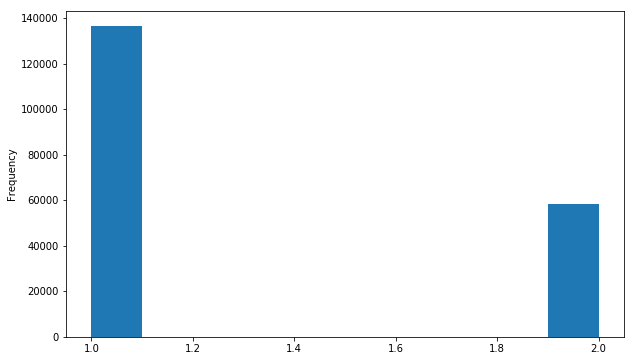

In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df2 =  df_p['SEVERITYCODE']
#df3 =  df_p['COLLISIONTYPE', 'SEVERITYCODE']


df2.plot(kind='hist', figsize=(10, 6))
#plt.ylabel('Collision Type')

#df3
#make with severity code

In [47]:
df_p["SEVERITYCODE"].value_counts()


1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Based off of the breakdown on the types of severity codes, the data is not balanced. I balance the dataset below.

In [48]:
from sklearn.utils import resample

df_p1 = df_p[df_p.SEVERITYCODE==1]
df_p2 = df_p[df_p.SEVERITYCODE==2]

#Downsample severity code 1
df_p_downsampled = resample(df_p1,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)

# Combine minority class with downsampled majority class
df_p_bal = pd.concat([df_p_downsampled, df_p2])

# Display new class counts
df_p_bal.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

# Metholdology

Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.

I will use the following three models to predict the severity of an accident on the five variables I determined above; K-nearest neighbors, Decision Tree, and Logistic Regression.

**Data Analysis**

In [78]:
import numpy as np
X = np.asarray(df_p[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'COLLISIONTYPE_CAT', 'ADDRTYPE_CAT']])
X[0:5]

array([[4, 8, 5, 0, 2],
       [6, 8, 2, 9, 1],
       [4, 0, 5, 5, 1],
       [1, 0, 5, 4, 1],
       [6, 8, 5, 0, 2]], dtype=int8)

In [79]:
y = np.asarray(df_p['SEVERITYCODE'])
y[0:5]

array([2, 1, 1, 1, 2])

In [80]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.35364615,  1.50545441,  0.3912104 , -1.51529661,  1.30002869],
       [ 1.04520829,  1.50545441, -1.18714134,  1.60875294, -0.58573264],
       [ 0.35364615, -0.68713674,  0.3912104 ,  0.22028647, -0.58573264],
       [-0.68369706, -0.68713674,  0.3912104 , -0.12683015, -0.58573264],
       [ 1.04520829,  1.50545441,  0.3912104 , -1.51529661,  1.30002869]])

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136271, 5) (136271,)
Test set: (58402, 5) (58402,)


**Decision Tree**

In [85]:

from sklearn import tree

tree2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 10)
tree2 = tree2.fit(X_train, y_train)
yhat = tree2.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [87]:

print (yhat [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 1 1 2 2]


**Logistic Regression**

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
LR_yhat = LR.predict(X_test)
LR_yhat

array([1, 1, 1, ..., 1, 1, 1])

In [90]:
yhat_p = LR.predict_proba(X_test)
yhat_p

array([[0.79005767, 0.20994233],
       [0.55461409, 0.44538591],
       [0.73987342, 0.26012658],
       ...,
       [0.54153834, 0.45846166],
       [0.82417844, 0.17582156],
       [0.75151285, 0.24848715]])

In [98]:
print (LR_yhat [0:5])
print (y_test [0:5])

[1 1 1 1 1]
[2 1 1 2 2]


**KNN**

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]


array([1, 1, 1, 2, 1])

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

In [107]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.7400107139450066
Test set Accuracy:  0.7413958426081299


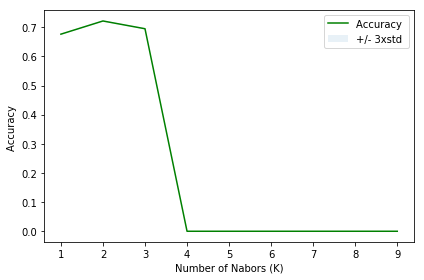

In [108]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

#k = 3 is the best model

# Results

In [93]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

**KNN**

In [109]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, yhat_knn)

0.7413958426081299

In [110]:
# F1-SCORE
f1_score(y_test, yhat_knn, average='macro')

0.5957518667147901

**Decision Tree**

In [112]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, yhat)

0.6948220951337283

In [113]:
# F1-SCORE
f1_score(y_test, yhat, average='macro')

0.6199998459480807

**LR**

In [115]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, LR_yhat)

0.7028183966302524

In [117]:
# F1-SCORE
f1_score(y_test, LR_yhat, average='macro')

0.4231162763523472

In [116]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.5832377523631

# Discussion

The most accurate model would be the KNN, with k = 3. This model would predict the severity the b

# Conclusion